,id,name,email,address,address2,amount_spent,raw_unstructured
0,692689,Jessica Adams,smithsheryl@hanson.biz,"956 Shane Station, North Shelly, Georgia, 0453...","313 Miller Terrace Suite 433, Vaughnton, DE 62276",8288.46,Jessica Adams (692689) spent $8288.46 - Contac...
1,220529,Kelly Livingston,carrie72@yahoo.com,"378 Brown Union, Andreaberg, Louisiana, 80123,...","853 Barrera Forges Apt. 774, South Edwintown, ...",6136.34,Kelly Livingston (220529) spent $6136.34 - Con...
2,652801,Sarah Miller,harmonstacy@medina.com,"083 Castro Mills, Lake John, Minnesota, 46746,...","968 Smith Ridge Apt. 477, Patrickberg, IN 50158",12322.27,Sarah Miller (652801) spent $12322.27 - Contac...
3,810775,Gina Wise,silvaclinton@yahoo.com,"12913 Ramirez Route, New Matthew, Georgia, 857...","901 Johnson Parkways Apt. 145, North Matthewto...",14351.21,Gina Wise (810775) spent $14351.21 - Contact: ...
4,383754,Danny Hull,kclark@yahoo.com,"553 Gregory Tunnel, South Barbara, Washington,...","47452 Sanchez Circle, Batesmouth, IL 28111",10154.07,Danny Hull (383754) spent $10154.07 - Contact:...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                200 non-null    int64  
 1   name              200 non-null    object 
 2   email             200 non-null    object 
 3   address           200 non-null    object 
 4   address2          200 non-null    object 
 5   amount_spent      200 non-null    float64
 6   raw_unstructured  200 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.1+ KB
None
count      200.000000
mean      7154.169600
std       4590.707224
min         87.420000
25%       2708.087500
50%       7084.930000
75%      11193.260000
max      14909.640000
Name: amount_spent, dtype: float64
spending_category
High         69
Very High    64
Low          27
Medium       24
Very Low     16
Name: count, dtype: int64


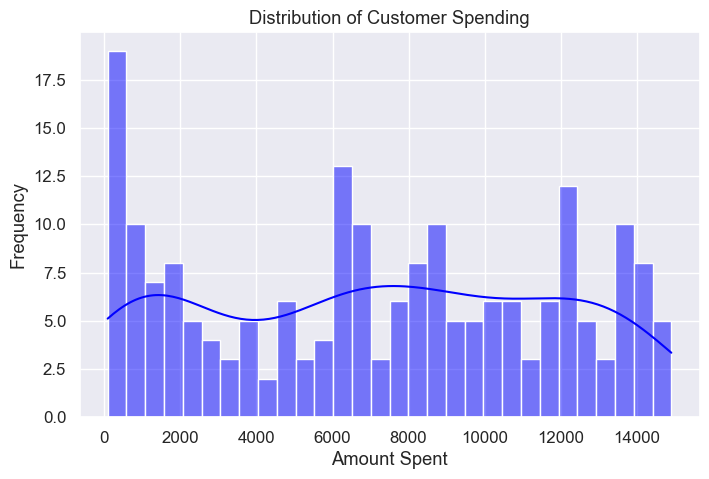

C:\Users\Prithviraj\AppData\Local\Temp\ipykernel_29168\1341727909.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="spending_category", data=df, palette="Set2")


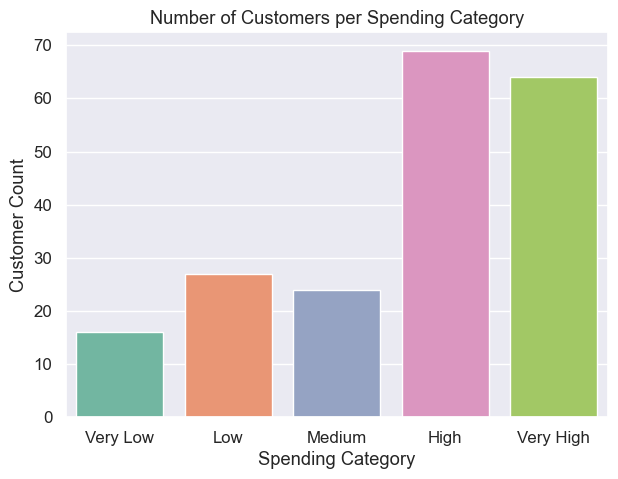

C:\Users\Prithviraj\AppData\Local\Temp\ipykernel_29168\1341727909.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="name", x="amount_spent", data=top10, palette="Blues_d")


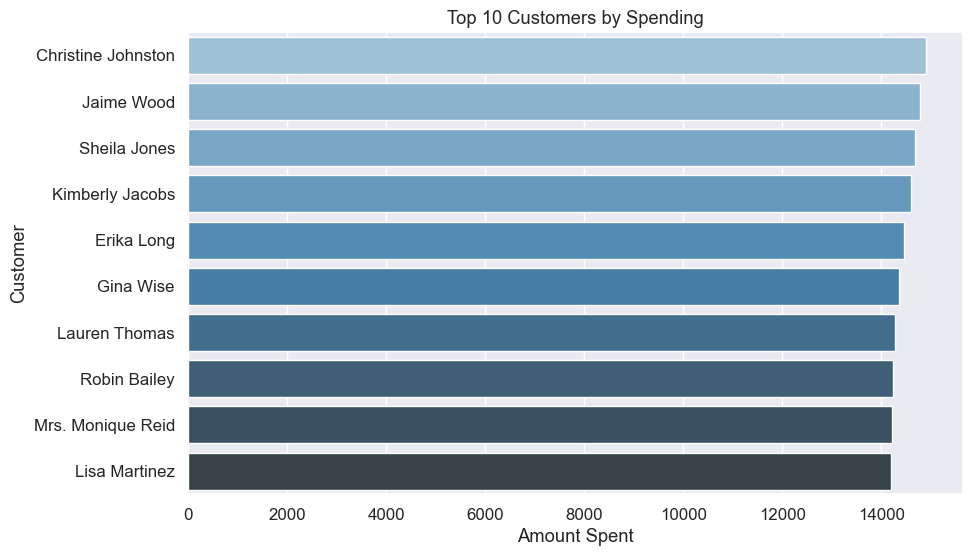

C:\Users\Prithviraj\AppData\Local\Temp\ipykernel_29168\1341727909.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_spending.values, y=country_spending.index, palette="viridis")


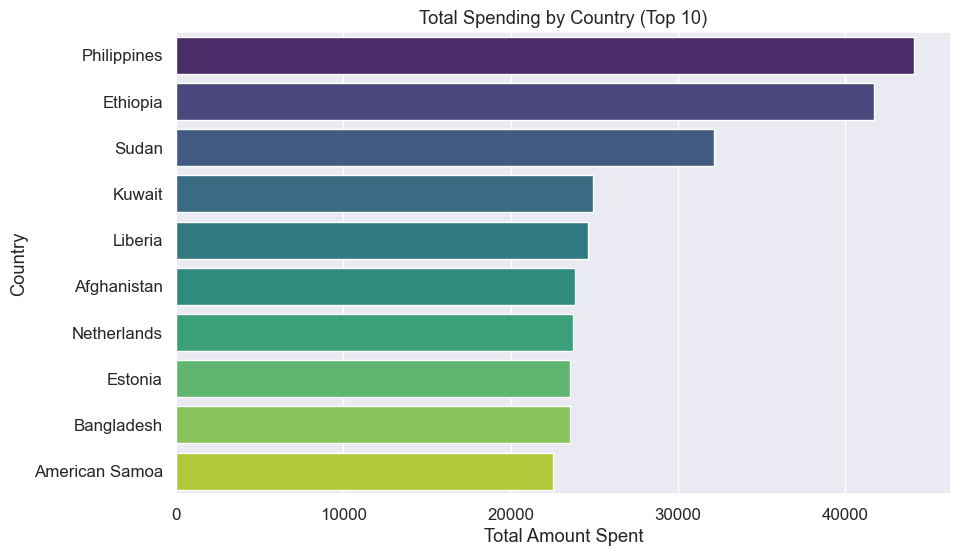

✅ Final cleaned data saved:
 - customers_cleaned_final.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set(font_scale=1.1)

df = pd.read_csv("customers_unstructured.csv")

display(df.head())
print(df.info())

df = df.dropna(subset=["id", "name", "email", "amount_spent"])
df = df.drop_duplicates(subset="id")
df["email"] = df["email"].str.lower()
df["address"] = df["address"].str.replace("\n", ", ").str.strip()
df["address2"] = df["address2"].str.replace("\n", ", ").str.strip()
df["amount_spent"] = pd.to_numeric(df["amount_spent"], errors="coerce")
df = df.dropna(subset=["amount_spent"])

df["city"] = df["address"].apply(lambda x: str(x).split(",")[1].strip() if "," in str(x) else "Unknown")
df["country"] = df["address"].apply(lambda x: str(x).split(",")[-1].strip() if "," in str(x) else "Unknown")
df["spending_category"] = pd.cut(df["amount_spent"],
                                 bins=[0, 500, 2000, 5000, 10000, 20000],
                                 labels=["Very Low", "Low", "Medium", "High", "Very High"])

print(df["amount_spent"].describe())
print(df["spending_category"].value_counts())

plt.figure(figsize=(8,5))
sns.histplot(df["amount_spent"], bins=30, kde=True, color="blue")
plt.title("Distribution of Customer Spending")
plt.xlabel("Amount Spent")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x="spending_category", data=df, palette="Set2")
plt.title("Number of Customers per Spending Category")
plt.xlabel("Spending Category")
plt.ylabel("Customer Count")
plt.show()

top10 = df.nlargest(10, "amount_spent")[["name", "amount_spent"]]
plt.figure(figsize=(10,6))
sns.barplot(y="name", x="amount_spent", data=top10, palette="Blues_d")
plt.title("Top 10 Customers by Spending")
plt.xlabel("Amount Spent")
plt.ylabel("Customer")
plt.show()

plt.figure(figsize=(10,6))
country_spending = df.groupby("country")["amount_spent"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_spending.values, y=country_spending.index, palette="viridis")
plt.title("Total Spending by Country (Top 10)")
plt.xlabel("Total Amount Spent")
plt.ylabel("Country")
plt.show()

df_final = df.copy()
df_final = df_final.drop(columns=["address2", "raw_unstructured"], errors="ignore")
df_final = df_final.sort_values(by="amount_spent", ascending=False)

df_final.to_csv("customers_cleaned_final.csv", index=False)
df_final.to_excel("customers_cleaned_final.xlsx", index=False)

print("✅ Final cleaned data saved:")
print(" - customers_cleaned_final.csv")
